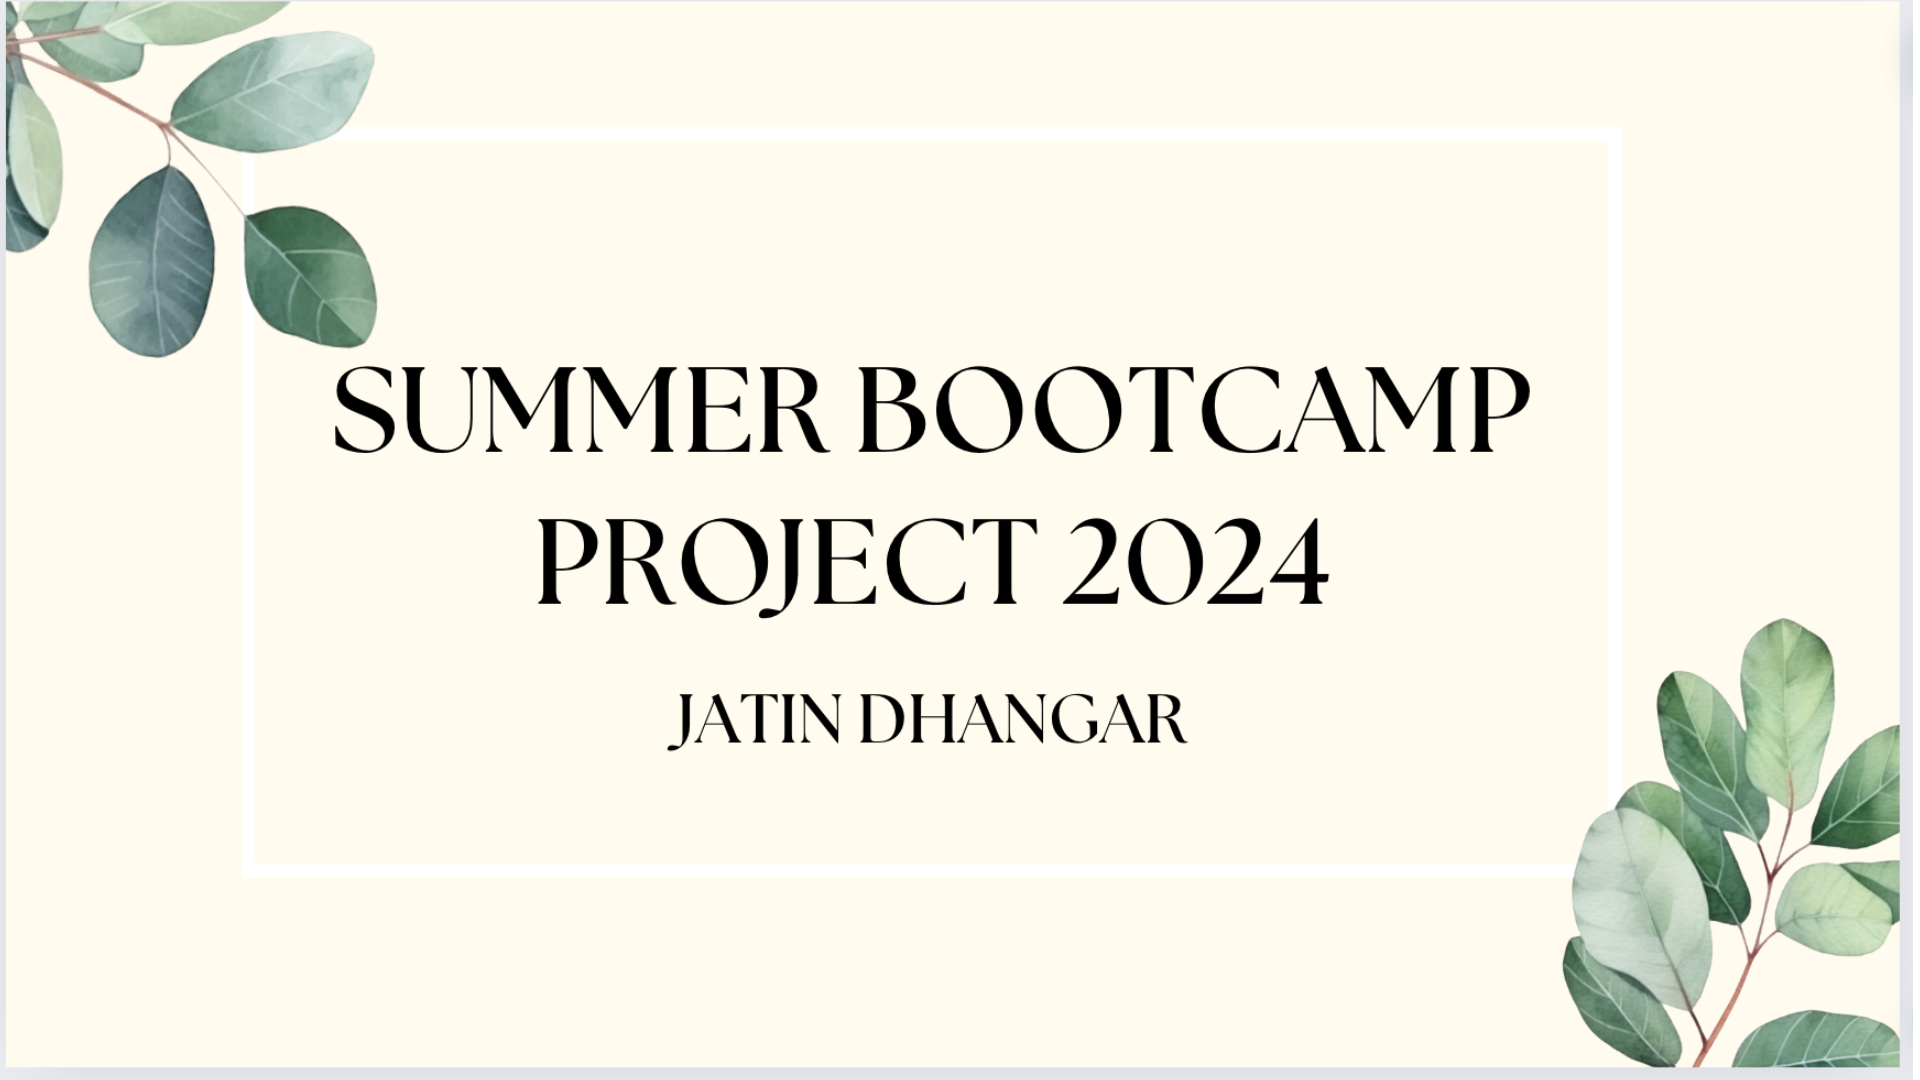

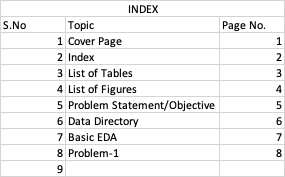

#LIST OF TABLES

#LIST OF FIGURES

#Problem Statement/Objective
The objective of this analysis is to provide comprehensive insights into the spending behavior of large retailers on various product categories across different regions and sales channels in Portugal. By analyzing the provided data, the aim is to identify patterns, trends, and significant differences in annual spending on fresh vegetables, milk, grocery items, frozen food, detergents and paper products, and delicatessen.
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

##Data Description
Data Dictionary
1.	Buyer/Spender- ID's of customers
2.	Region- Region of the distributor
3.	Fresh- spending on Fresh Vegetables
4.	Milk- spending on milk
5.	Grocery- spending on grocery
6.	Frozen- spending on frozen food
7.	Detergents_paper- spending on detergents and toilet paper
8.	Delicatessen- spending on instant foods

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
data=pd.read_csv("/content/4-Wholesale Customer_New.csv")

##Basic Steps
###1-Display first Five Rows

In [204]:
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


###Observation:- the fresh in 3 column is ? that should be corrected

###2-Display Last Five Rows

In [205]:
data.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


###3-	Check the shape of dataset

In [206]:
data.shape

(440, 9)

###4- Check the datatypes of each feature

In [207]:
data.dtypes

Buyer/Spender         int64
Channel              object
Region               object
Fresh                object
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object

###observations:-Fresh, Frozen, Detergents_Paper, and Delicatessen are represented as object instead of float64 or int64. Typically, these columns should contain numerical data (either integers or floating-point numbers) representing quantities or amounts.

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             440 non-null    object 
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 31.1+ KB


###5-	Check the Statistical summary

In [209]:
data.describe()

,Buyer/Spender,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,437.000000,439.000000,438.000000
mean,220.500000,6035.779545,7951.277273,3085.638444,3773.747153,1531.057078
std,127.161315,8964.929649,9503.162829,4867.744145,19364.886053,2825.044262
min,1.000000,1.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,1525.250000,2153.000000,744.000000,256.500000,411.250000
50%,220.500000,3641.000000,4755.500000,1535.000000,813.000000,971.000000
75%,330.250000,7217.500000,10655.750000,3570.000000,3956.000000,1822.750000
max,440.000000,112400.000000,92780.000000,60869.000000,396100.000000,47943.000000


######OBSERVATIONS:-:- Frozen: The count is 437, which is less than the total count of 440 for other columns (Milk, Grocery, Detergents_Paper, Delicatessen). This indicates there are missing values in the Frozen column.

Detergents_Paper: The standard deviation (std) is extremely high compared to the mean. This suggests that the values in this column are highly variable and might include outliers or a wide range of values.

Delicatessen: Similar to Frozen, the count is 438, which is less than 440. This indicates there are missing values in the Delicatessen column.

###6-	Check the null values

In [210]:
data.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

OBSERVATIONS:-The dataset appears to have missing values across several columns (Channel, Region, Frozen, Detergents_Paper, Delicatessen). The presence of missing data could potentially affect analyses that rely on complete datasets. Depending on the nature of the analysis, strategies such as imputation (replacing missing values with estimated values based on available data) or exclusion of incomplete records may be necessary to ensure robust and accurate results.



###7-	Check the duplicate values

In [211]:
data.duplicated().sum()

0

###9-	Check the outliers and their authenticity

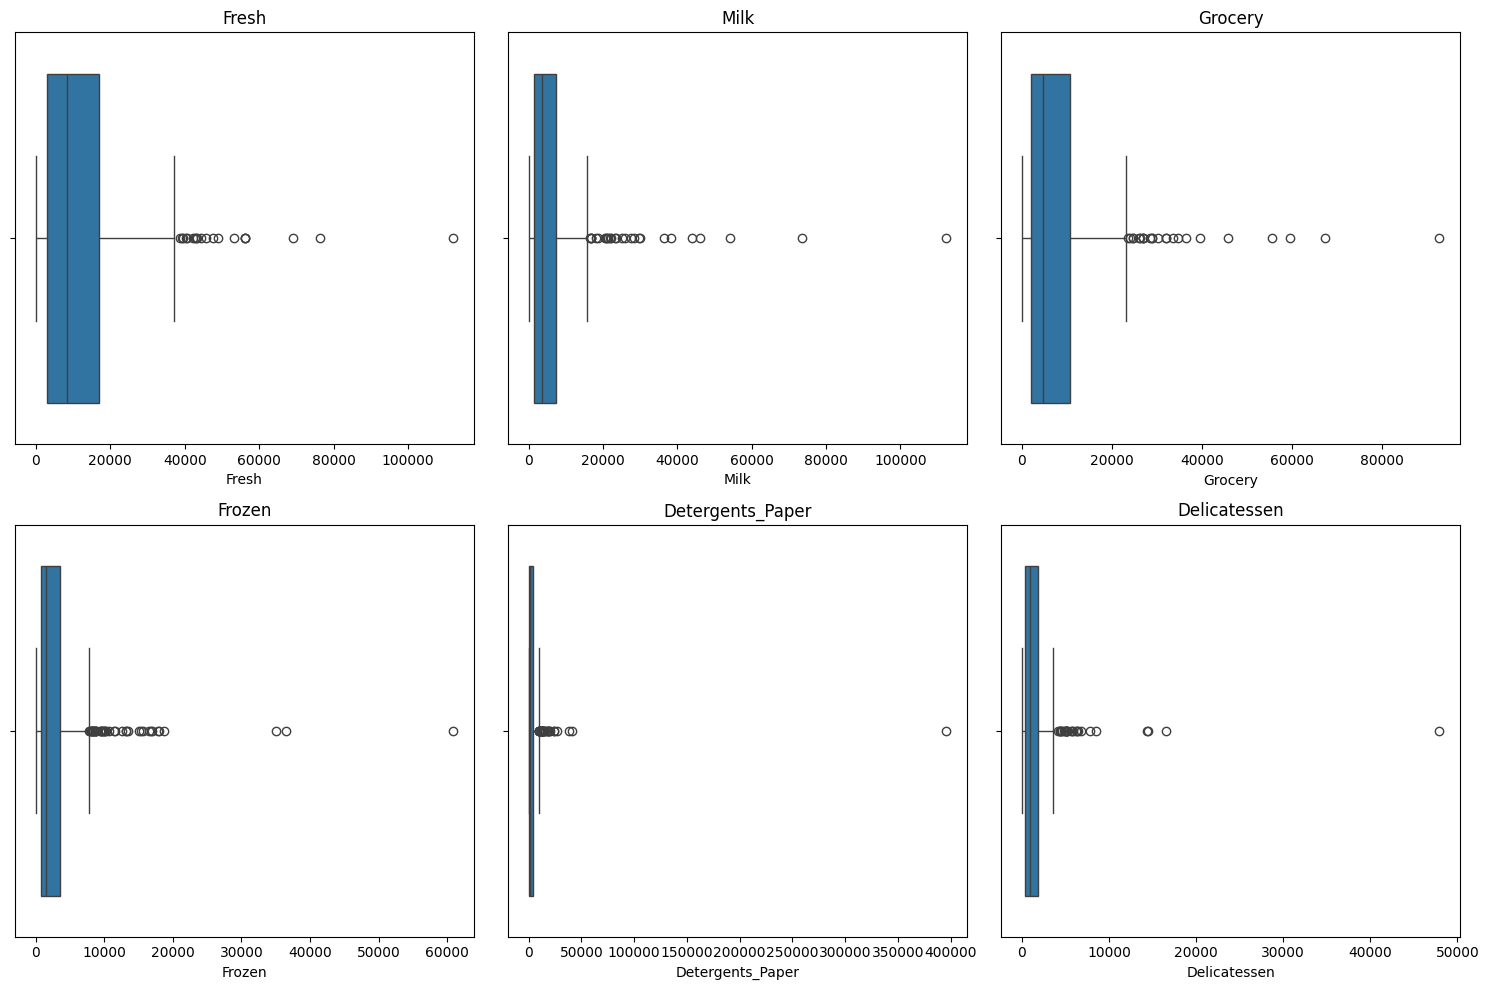

Outliers detected by IQR method:
Fresh               20
Milk                27
Grocery             24
Frozen              42
Detergents_Paper    31
Delicatessen        27
dtype: int64

Extreme values detected (potential anomalies):
Fresh               188
Milk                 67
Grocery             117
Frozen               22
Detergents_Paper     27
Delicatessen          4
dtype: int64


In [212]:
file_path = "/content/4-Wholesale Customer_New.csv"
df = pd.read_csv(file_path)

numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

for col in numerical_columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        print(f"Conversion failed for column: {col}")

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected by IQR method:")
print(outliers)

extreme_threshold = 10000
extreme_values = (df[numerical_columns] > extreme_threshold).sum()
print("\nExtreme values detected (potential anomalies):")
print(extreme_values)

###8- Check the anomalies or wrong entries.

In [213]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64


In [214]:
print("\nData types:")
print(data.dtypes)


Data types:
Buyer/Spender         int64
Channel              object
Region               object
Fresh                object
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object


In [215]:
print("\nStatistical summary for numerical columns:")
print(data.describe())


Statistical summary for numerical columns:
       Buyer/Spender           Milk       Grocery        Frozen  \
count     440.000000     440.000000    440.000000    437.000000   
mean      220.500000    6035.779545   7951.277273   3085.638444   
std       127.161315    8964.929649   9503.162829   4867.744145   
min         1.000000       1.000000      3.000000     25.000000   
25%       110.750000    1525.250000   2153.000000    744.000000   
50%       220.500000    3641.000000   4755.500000   1535.000000   
75%       330.250000    7217.500000  10655.750000   3570.000000   
max       440.000000  112400.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        439.000000    438.000000  
mean        3773.747153   1531.057078  
std        19364.886053   2825.044262  
min            3.000000      3.000000  
25%          256.500000    411.250000  
50%          813.000000    971.000000  
75%         3956.000000   1822.750000  
max       396100.000000  47943.0

In [280]:
print("\nUnique values in 'Region':")
print(data['Region'].unique())


Unique values in 'Region':
['Other' 'Lisbon' nan 'Oporto']


In [217]:
print("\nUnique values in 'Channel':")
print(data['Channel'].unique())


Unique values in 'Channel':
['Retail' 'Hotel' nan]


###10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [254]:
#? to nan
data['Fresh']=data['Fresh'].replace('?',np.nan)
data['Frozen']=data['Frozen'].replace('?',np.nan)
data['Detergents_Paper']=data['Detergents_Paper'].replace('?',np.nan)
data['Delicatessen']=data['Delicatessen'].replace('?',np.nan)

In [255]:
data.drop(['Channel','Region'],axis=1,inplace=True)


In [256]:
#Fresh, Frozen, Detergents_Paper, and Delicatessen are represented as object instead of float64 or int64. Typically, these columns should contain numerical data (either integers or floating-point numbers) representing quantities or amounts.

data['Frozen']=data['Frozen'].astype(float)
data['Detergents_Paper']=data['Detergents_Paper'].astype(float)
data['Delicatessen']=data['Delicatessen'].astype(float)
data['Fresh']=data['Fresh'].astype(float)
data.dtypes

Buyer/Spender         int64
Fresh               float64
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object

In [221]:
data['Milk'] = pd.to_numeric(data['Milk'], errors='coerce')

In [222]:
data.isnull().sum()

Buyer/Spender       0
Fresh               2
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

In [226]:
##drop unnessecary columns
data.drop(['Channel','Region'],axis=1,inplace=True)

##1.	Spending Analysis
###•	What is the total number of buyers in the dataset?


In [227]:
data['Buyer/Spender'].nunique()

440

###•	What is the average spending on each category (Fresh, Milk, Grocery, Frozen, Detergents_paper, Delicatessen)?

In [228]:

import pandas as pd

data = pd.read_csv("/content/4-Wholesale Customer_New.csv")

data.drop(['Channel', 'Region'], axis=1, inplace=True)


data['Fresh'] = data['Fresh'].replace('?', np.nan)
data['Frozen'] = data['Frozen'].replace('?', np.nan)
data['Detergents_Paper'] = data['Detergents_Paper'].replace('?', np.nan)
data['Delicatessen'] = data['Delicatessen'].replace('?', np.nan)

# Convert object columns to float
data['Fresh'] = data['Fresh'].astype(float)
data['Frozen'] = data['Frozen'].astype(float)
data['Detergents_Paper'] = data['Detergents_Paper'].astype(float)
data['Delicatessen'] = data['Delicatessen'].astype(float)

# Calculate the average spending on each category
average_spending = data.mean(axis=0)

# Print the average spending on each category
print("Average spending on each category:")
print(average_spending[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']])


Average spending on each category:
Fresh               12016.009132
Milk                 6035.779545
Grocery              7951.277273
Frozen               3085.638444
Detergents_Paper     3773.747153
Delicatessen         1531.057078
dtype: float64


###•	Which category has the highest average spending?

In [229]:
data.mean().idxmax()

'Fresh'

###•	How many buyers spend above the average on Fresh Vegetables?

In [230]:
data[data['Fresh']>data['Fresh'].mean()].count()

Buyer/Spender       158
Fresh               158
Milk                158
Grocery             158
Frozen              157
Detergents_Paper    158
Delicatessen        158
dtype: int64

##2.	Regional Demand
###•	What is the total spending in each Region?


In [235]:
regional_spending = data.groupby('Region').sum()
print(regional_spending)


        Buyer/Spender                                            Channel  \
Region                                                                     
Lisbon          17592  HotelRetailHotelHotelRetailRetailHotelHotelHot...   
Oporto          13581  RetailHotelRetailHotelRetailRetailHotelRetailR...   
Other           64026  RetailRetailRetailHotelRetailRetailRetailRetai...   

                                                    Fresh     Milk  Grocery  \
Region                                                                        
Lisbon  3062424271168696703067448425203583195611076373...   397328   534652   
Oporto  3996212737588190878090675844416448528328862599...   232764   418529   
Other   126697057?132652261594131212675795963600633661...  1994145  2495251   

          Frozen  Detergents_Paper  Delicatessen  
Region                                            
Lisbon  222550.0          577447.0       98496.0  
Oporto  173172.0          172339.0       50668.0  
Other   927266.0   

###•	Which region has the highest spending on Milk?

In [236]:
regional_spending = data.groupby('Region').sum()
region_with_highest_milk_spending = regional_spending['Milk'].idxmax()
print(f"Region with the highest spending on Milk: {region_with_highest_milk_spending}")


Region with the highest spending on Milk: Other


###•	How does the average spending on Grocery vary across different regions?

In [237]:
data.groupby('Region')['Grocery'].mean()

Region
Lisbon    7128.693333
Oporto    9733.232558
Other     7896.363924
Name: Grocery, dtype: float64

###•	Which region has the highest average spending per buyer?

In [238]:
data.groupby('Region')['Buyer/Spender'].count()

Region
Lisbon     75
Oporto     43
Other     316
Name: Buyer/Spender, dtype: int64

##3.	Category Preferences
###•	What percentage of buyers spend more on Frozen food compared to Delicatessen?

In [239]:
total_buyers = len(data)
buyers_more_frozen = data[data['Frozen'] > data['Delicatessen']].shape[0]
percentage = (buyers_more_frozen / total_buyers) * 100
print(f"{percentage:.2f}% of buyers spend more on Frozen food compared to Delicatessen.")


64.09% of buyers spend more on Frozen food compared to Delicatessen.


###•	Which category shows the most variation in spending among buyers?

In [245]:
std_deviation = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].std()

category_with_most_variation = std_deviation.idxmax()
max_variation_value = std_deviation.max()

print(f"The category with the most variation in spending among buyers is '{category_with_most_variation}' with a standard deviation of {max_variation_value:.2f}.")

The category with the most variation in spending among buyers is 'Detergents_Paper' with a standard deviation of 19364.89.


###•	Are there any regions where spending on Detergents_paper is significantly higher than others?

In [250]:
grouped_data = data.groupby('Region')['Detergents_Paper'].sum()
mean_spending = grouped_data.mean()
significantly_higher_spending = grouped_data[grouped_data > (mean_spending + 2 * grouped_data.std())]

print(f"Regions with significantly higher spending on Detergents_paper:")
print(significantly_higher_spending)


Regions with significantly higher spending on Detergents_paper:
Series([], Name: Detergents_Paper, dtype: float64)


###•	What is the correlation between spending on Fresh and Frozen food?

In [257]:
correlation = data['Fresh'].corr(data['Frozen'])
print("Correlation between spending on Fresh and Frozen food:", correlation)


Correlation between spending on Fresh and Frozen food: 0.34546162205268055


##4.	Customer Segmentation
###•	Can buyers be grouped into segments based on their spending patterns? (e.g., using clustering analysis)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

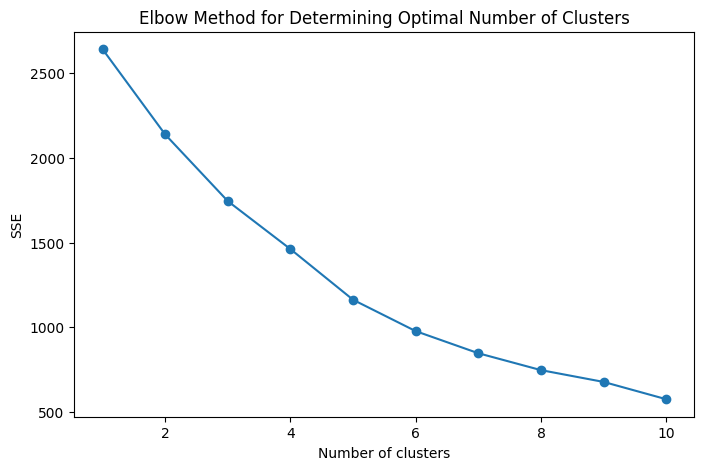

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.63


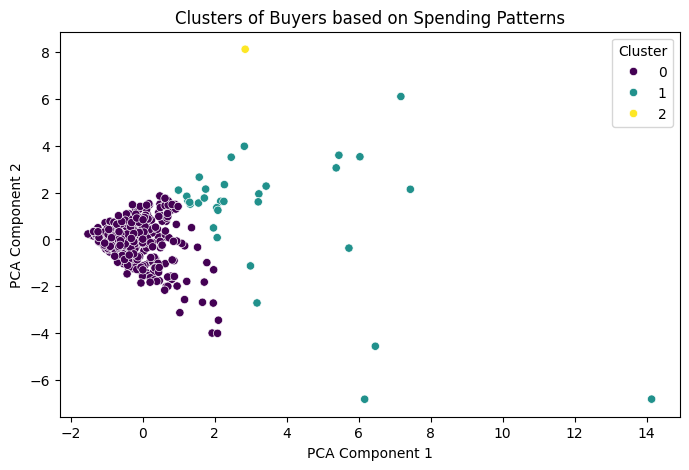

In [260]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Assuming 'data' is your DataFrame containing the wholesale distributor data

# Select relevant columns for clustering
spending_data = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]

# Handle missing values by filling with the median
spending_data = spending_data.fillna(spending_data.median())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spending_data)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k to find the elbow point
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (e.g., 3) based on the Elbow Method
optimal_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Calculate silhouette score to evaluate clustering
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Visualize the clusters (using the first two principal components for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of Buyers based on Spending Patterns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



###•	What are the characteristics of the top 10% spenders in each category?




In [261]:
def top_10_spenders(data, category):

  threshold = data[category].quantile(0.9)

  top_spenders = data[data[category] > threshold]


  return top_spenders.describe()

for category in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']:
  print(f"\nTop 10% Spenders in {category}:")
  print(top_10_spenders(data, category))



Top 10% Spenders in Fresh:
       Buyer/Spender          Fresh          Milk       Grocery        Frozen  \
count      44.000000      44.000000     44.000000     44.000000     44.000000   
mean      211.568182   40693.909091   8172.000000   8790.795455   7723.500000   
std       131.158416   15627.339389  11731.181001  11854.955558  10744.824852   
min        13.000000   27167.000000    286.000000    471.000000    287.000000   
25%       100.000000   30562.750000   2054.250000   2493.250000   1726.250000   
50%       218.500000   36832.000000   3954.500000   5428.500000   4494.500000   
75%       295.500000   43565.250000   7265.500000   8578.250000   8871.000000   
max       437.000000  112151.000000  54259.000000  59598.000000  60869.000000   

       Detergents_Paper  Delicatessen    Cluster  
count         44.000000     44.000000  44.000000  
mean        2067.090909   3388.250000   0.136364  
std         5290.277022   7322.547159   0.347142  
min           20.000000      3.000000 

###•	How do spending patterns differ between high spenders and low spenders?

In [262]:
high_spenders = data.loc[data['Grocery'] > data['Grocery'].mean(), :]
low_spenders = data.loc[data['Grocery'] <= data['Grocery'].mean(), :]

for category in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']:
  print(f"\nSpending on {category}:")
  print("High Spenders:")
  print(high_spenders[category].describe())
  print("Low Spenders:")
  print(low_spenders[category].describe())



Spending on Fresh:
High Spenders:
count       149.000000
mean      10845.986577
std       14429.522014
min          18.000000
25%        2343.000000
50%        5550.000000
75%       14531.000000
max      112151.000000
Name: Fresh, dtype: float64
Low Spenders:
count      289.000000
mean     12619.238754
std      11646.158899
min          3.000000
25%       4155.000000
50%       9561.000000
75%      17546.000000
max      76237.000000
Name: Fresh, dtype: float64

Spending on Milk:
High Spenders:
count      149.000000
mean     11387.255034
std       9997.503449
min        944.000000
25%       6128.000000
50%       8384.000000
75%      12697.000000
max      73498.000000
Name: Milk, dtype: float64
Low Spenders:
count       291.000000
mean       3295.676976
std        6957.462510
min           1.000000
25%        1114.500000
50%        2096.000000
75%        3818.500000
max      112400.000000
Name: Milk, dtype: float64

Spending on Grocery:
High Spenders:
count      149.000000
mean     17158

##5.	Cross-Category Analysis
###•	Is there a correlation between spending on Milk and Grocery?

In [263]:
correlation = data['Milk'].corr(data['Grocery'])
print("Correlation between spending on Milk and Grocery:", correlation)


Correlation between spending on Milk and Grocery: 0.5902889029079396


###•	Do buyers who spend more on Delicatessen also spend more on Frozen food?

In [264]:
correlation = data['Delicatessen'].corr(data['Frozen'])

print("Correlation between spending on Delicatessen and Frozen food:", correlation)

if correlation > 0:
  print("There is a positive correlation between spending on Delicatessen and Frozen food.")
  print("This means that buyers who spend more on Delicatessen tend to also spend more on Frozen food.")
elif correlation < 0:
  print("There is a negative correlation between spending on Delicatessen and Frozen food.")
  print("This means that buyers who spend more on Delicatessen tend to spend less on Frozen food.")
else:
  print("There is no correlation between spending on Delicatessen and Frozen food.")


Correlation between spending on Delicatessen and Frozen food: 0.38975693044209864
There is a positive correlation between spending on Delicatessen and Frozen food.
This means that buyers who spend more on Delicatessen tend to also spend more on Frozen food.


###•	What is the combined average spending on Fresh and Milk for each region?

In [268]:

data['Fresh'] = pd.to_numeric(data['Fresh'], errors='coerce')
data['Milk'] = pd.to_numeric(data['Milk'], errors='coerce')

data = data.dropna(subset=['Fresh', 'Milk'])


data['Fresh_Milk'] = data['Fresh'] + data['Milk']

combined_avg_spending = data.groupby('Region')['Fresh_Milk'].mean()

print("Combined average spending on Fresh and Milk for each region:")
print(combined_avg_spending)


Combined average spending on Fresh and Milk for each region:
Region
Lisbon    16571.146667
Oporto    15467.604651
Other     18877.770701
Name: Fresh_Milk, dtype: float64


<ipython-input-268-c07c0557f2b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fresh_Milk'] = data['Fresh'] + data['Milk']


##6.	Demand Trends
###•	Which region has the fastest growing spending on Fresh Vegetables?


###•	How does the total spending on Grocery change across regions over time (if time data is available)?

###•	What is the average spending per buyer in each category over a specified time period (if time data is available)?

#WE CANT PERFORM THE ABOVE QUESTIONS AS TIME DATASET IS NOT GIVEN

##7.	Buyer Insights
###•	What is the repeat purchase rate for buyers who spend above the average in at least three categories?



In [191]:

above_average_buyers = data[data.apply(lambda x: (x > x.mean()).sum() >= 3, axis=1)]

repeat_purchases = above_average_buyers[above_average_buyers.duplicated(subset='Buyer/Spender', keep=False)]

repeat_purchase_rate = len(repeat_purchases) / len(above_average_buyers)

print(f"Repeat purchase rate for buyers who spend above the average in at least three categories: {repeat_purchase_rate:.2%}")


Repeat purchase rate for buyers who spend above the average in at least three categories: 0.00%


###•	How many buyers spend consistently (i.e., similar amounts) across all categories?

In [195]:
def consistent_buyers(data):
  cv = data.std(axis=1) / data.mean(axis=1)

  threshold = 0.2
  consistent_buyers = data[cv < threshold]
  return len(consistent_buyers)

num_consistent_buyers = consistent_buyers(data)

print(f"Number of consistent buyers: {num_consistent_buyers}")


Number of consistent buyers: 0


###•	Which region has the most diverse spending patterns (i.e., high variance in spending across categories)?

In [282]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the wholesale distributor data

# Check for the presence of the 'Region' column
if 'Region' not in data.columns:
    print("The 'Region' column is missing in the dataset.")
else:
    # Select numerical columns for analysis
    numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

    # Calculate variance for each numerical column grouped by region
    region_variances = data.groupby('Region')[numerical_columns].var()

    # Sum the variances across all numerical columns to get a single variance score per region
    region_variances['Total_Variance'] = region_variances.sum(axis=1)

    # Identify the region with the highest total variance
    most_diverse_region = region_variances['Total_Variance'].idxmax()
    highest_variance = region_variances['Total_Variance'].max()

    # Display the results
    print(f"The region with the most diverse spending patterns is {most_diverse_region} with a total variance of {highest_variance:.2f}.")
    print("\nDetailed variance by category for each region:")
    print(region_variances)


The 'Region' column is missing in the dataset.
